In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline
 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


2026-01-11 18:59:05.124531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-11 18:59:05.558830: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-11 18:59:08.120674: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


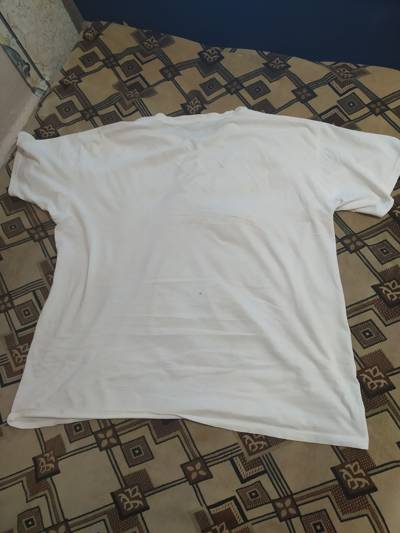

In [14]:
path = 'train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [15]:
img = load_img(fullname, target_size=(299, 299))


In [16]:
print(img)
 
# Output: <PIL.Image.Image image mode=RGB size=299x299 at 0x7F8593FA2E20>


<PIL.Image.Image image mode=RGB size=299x299 at 0x7F9901727F50>


In [17]:
x = np.array(img)
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

In [18]:
x.shape

(299, 299, 3)

# pre trained convolutional neural network

In [19]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
 
# weights = "imagenet" means we want to use pre-trained network that was trained on imagenet
 
model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

2026-01-11 19:18:14.387590: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [20]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [21]:
X = preprocess_input(X)
X[0]

array([[[-0.2235294 , -0.2235294 , -0.31764704],
        [-0.09019607, -0.09019607, -0.18431371],
        [-0.10588235, -0.10588235, -0.19999999],
        ...,
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.827451  , -0.77254903, -0.64705884]],

       [[-0.16862744, -0.16862744, -0.26274508],
        [-0.05882353, -0.05882353, -0.15294117],
        [-0.04313725, -0.04313725, -0.1372549 ],
        ...,
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ]],

       [[-0.0745098 , -0.0745098 , -0.16862744],
        [-0.01960784, -0.01960784, -0.11372548],
        [ 0.0196079 ,  0.0196079 , -0.0745098 ],
        ...,
        [-0.8039216 , -0.7490196 , -0.62352943],
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.8117647 , -0.75686276, -0.6313726 ]],

       ...,

       [[-0.38039213, -0.4352941 , -0.58431375],
        [-0

In [23]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [24]:
pred.shape

(1, 1000)

In [25]:
pred

array([[7.93421623e-06, 2.29904254e-05, 1.86046000e-05, 1.21311150e-05,
        3.56102719e-05, 5.05428470e-05, 1.62711531e-05, 6.67502582e-06,
        1.18210000e-05, 8.68091047e-06, 1.64008343e-05, 9.85443239e-06,
        5.54320786e-06, 1.11509762e-05, 8.21301364e-06, 1.58589519e-05,
        2.06636287e-05, 7.27878387e-06, 1.09453340e-05, 1.35590353e-05,
        6.46271656e-05, 7.38304379e-06, 2.10898579e-05, 8.65452512e-06,
        1.72424661e-05, 2.22219023e-05, 1.01932646e-05, 1.48188692e-05,
        2.74048980e-05, 2.16142780e-05, 1.98762446e-05, 1.62635661e-05,
        1.79627004e-05, 3.22356027e-05, 3.58759462e-05, 2.97037386e-05,
        1.69238392e-05, 2.12038231e-05, 2.22703802e-05, 9.92225432e-06,
        5.82137773e-06, 3.35355471e-05, 1.10243536e-05, 1.24579892e-05,
        2.67892447e-05, 3.06852417e-05, 1.01089836e-05, 1.07007618e-05,
        1.49857578e-05, 2.62382928e-05, 3.31302472e-05, 1.40751990e-05,
        2.60513661e-05, 3.26014342e-05, 1.24955777e-05, 1.831170

In [26]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.9524979)),
  ('n04370456', 'sweatshirt', np.float32(0.009788689)),
  ('n04033995', 'quilt', np.float32(0.0031949775)),
  ('n03710637', 'maillot', np.float32(0.0012328895)),
  ('n03188531', 'diaper', np.float32(0.001185509))]]